# EDA. Exploring students characteristics and prior info

Importing libraries:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 22 }
plt.rc('font', **font)

Data path:

In [3]:
data_path = '../data'

In [4]:
ls "$data_path"

grades.bak.json             students-ca116-2016.csv
grades.json                 students-ca116-2017.csv
improvement-ca114-2016.csv  students-ca116-2018.csv
improvement-ca114-2017.csv  students-ca117-2016.csv
improvement-ca116-2017.csv  students-ca117-2017.csv
improvement-ca117-2017.csv  students-ca277-2017.csv
improvement-ca277-2017.csv  students-ca277-2018.csv
improvement-ca278-2017.csv  students-ca278-2017.csv
program.py                  web_data.ca116.csv
students-ca114-2016.csv     web_data.csv
students-ca114-2017.csv


## Course: CA117, 2015/2016 vs 2016/2017

In [5]:
# 2015/2016
students_ca117_2016 = pd.read_csv(os.path.join(data_path, 'students-ca117-2016.csv'))

In [6]:
students_ca117_2016.head()

,Student,Username,CAO Points,Route,Route Category,Math Leaving Cert.,Degree,Number Years,Age,Gender,Bio,Distance
0,15330326,ajayid2,410,Leaving Cert.,0,37,0,1,17,0,0,4028.63
1,15434842,aliu2,410,Leaving Cert.,0,37,0,1,17,0,0,36609.92
2,15361731,allend6,430,Leaving Cert.,0,91,0,1,18,0,0,74795.85
3,15380871,alsafaf2,976,Access,7,37,0,1,16,0,0,886.01
4,15443198,arkhanm2,410,Leaving Cert.,0,46,0,1,18,0,1,137760.30


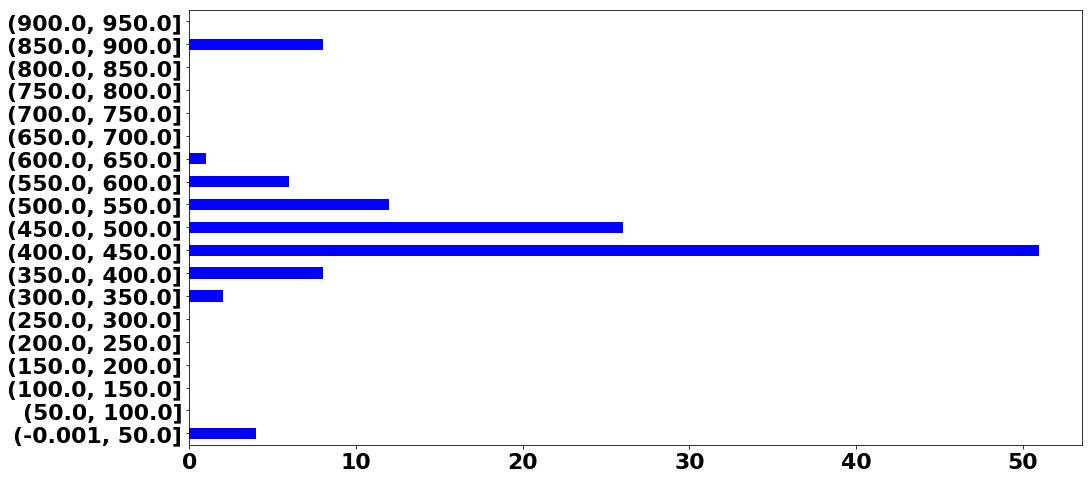

In [7]:
fig = pd.cut(students_ca117_2016['CAO Points'], bins=range(0, 1000, 50), include_lowest=True).\
    value_counts(sort=False).plot.barh(rot=0, color="blue", figsize=(16, 8))

In [8]:
fig.get_figure().savefig('../figures/exploring_CAO_Points_CA117_2016.png', bbox_inches="tight")

In [9]:
# 2016/2017
students_ca117_2017 = pd.read_csv(os.path.join(data_path, 'students-ca117-2017.csv'))

In [10]:
students_ca117_2017.head()

,Student,Username,CAO Points,Route,Route Category,Math Leaving Cert.,Degree,Number Years,Age,Gender,Bio,Distance
0,16105419,abdulmo2,0,Leaving Cert.,0,0,0,1,22,0,4,128932.65
1,16395986,afanaa2,450,Leaving Cert.,0,81,0,1,18,0,0,18905.94
2,16315811,agnewm4,465,Leaving Cert.,0,91,0,1,18,0,0,14707.09
3,16449876,ahernes3,425,Leaving Cert.,0,46,0,1,19,0,0,86316.47
4,15380871,alsafaf2,976,Access,7,37,0,2,16,0,0,886.01


Numeric features:

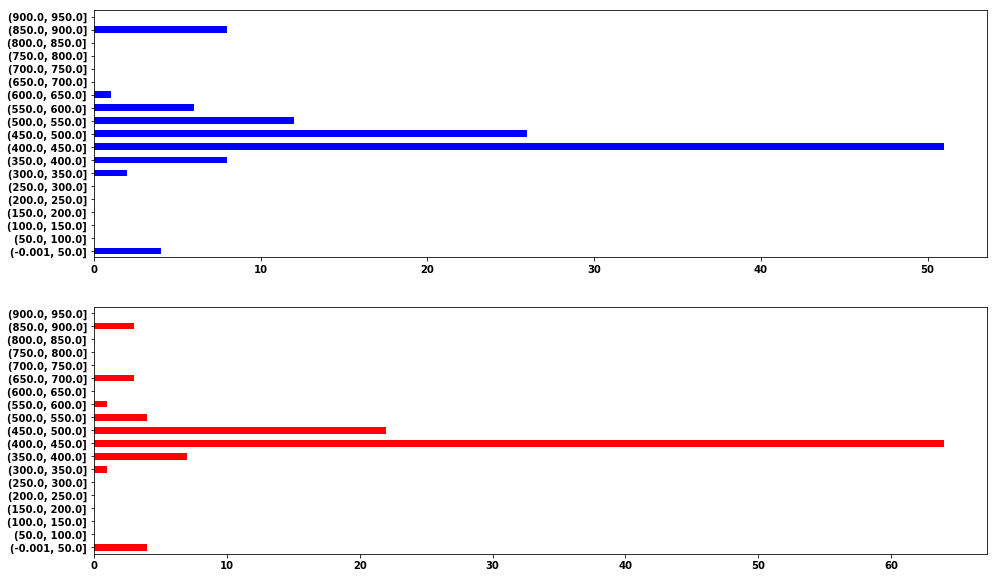

In [11]:
rects1 = pd.cut(students_ca117_2016['CAO Points'], bins=range(0, 1000, 50), include_lowest=True).\
    value_counts(sort=False)
rects2 = pd.cut(students_ca117_2017['CAO Points'], bins=range(0, 1000, 50), include_lowest=True).\
    value_counts(sort=False)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))
axes = axes.flatten()
rects1.plot.barh(rot=0, color="blue", ax=axes[0], fontsize=10)
rects2.plot.barh(rot=0, color="red", ax=axes[1], fontsize=10)

In [12]:
fig.savefig('../figures/exploring_CAO_Points_CA117_2016_2017.png', bbox_inches="tight")

In [13]:
def plot_numeric_feature(course, feature, students_one, year_one, students_two, year_two, 
                         categories = range(0, 1000, 50)):
    
    # Data in categories
    cat_one = pd.cut(students_one[feature], bins=categories, include_lowest=True).value_counts(sort=False)
    cat_two = pd.cut(students_two[feature], bins=categories, include_lowest=True).value_counts(sort=False)
    
    fig, ax = plt.subplots(figsize=(16, 10))
    index = np.arange(len(categories) - 1)
    bar_width = 0.35
    opacity = 0.4

    rects1 = ax.barh(index, cat_one.values, bar_width, alpha=opacity, color='b', label=year_one)
    rects2 = ax.barh(index + bar_width, cat_two.values, bar_width, alpha=opacity, color='r', label=year_two)

    ax.set_xlabel('Number of Students')
    ax.set_ylabel(feature)
    ax.set_yticks(index + bar_width / 2)
    ax.set_yticklabels(cat_one.index)
    ax.legend()

    fig.tight_layout()
    
    plt.savefig('../figures/exploring_{}_{}_{}_{}.png'.format(
                    feature.replace(' ', '_'), course.upper(), year_one, year_two), bbox_inches="tight")

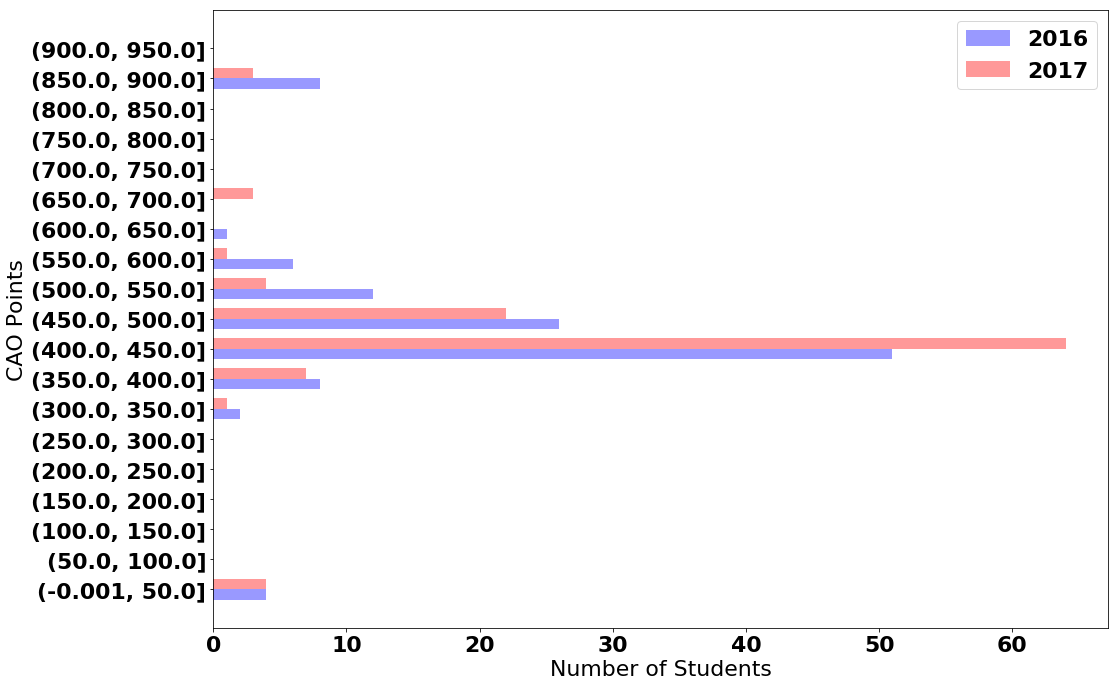

In [14]:
plot_numeric_feature('CA117', 'CAO Points', students_ca117_2016, 2016, students_ca117_2017, 2017)

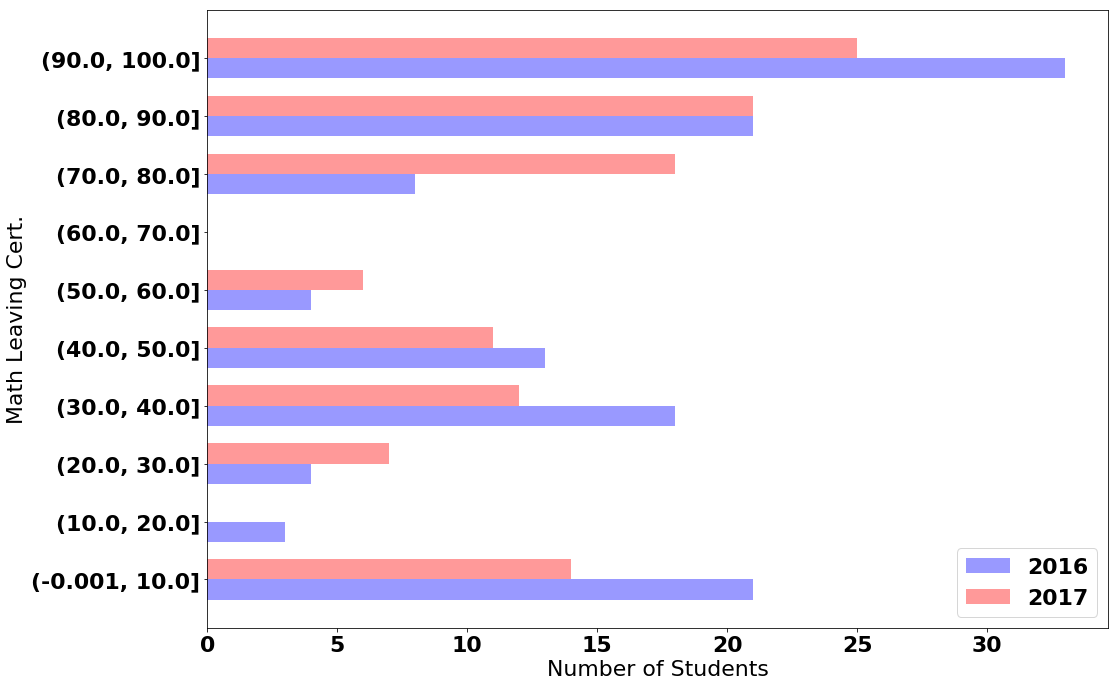

In [15]:
plot_numeric_feature('CA117', 'Math Leaving Cert.', students_ca117_2016, 2016, students_ca117_2017, 2017,
                     categories = range(0, 110, 10))

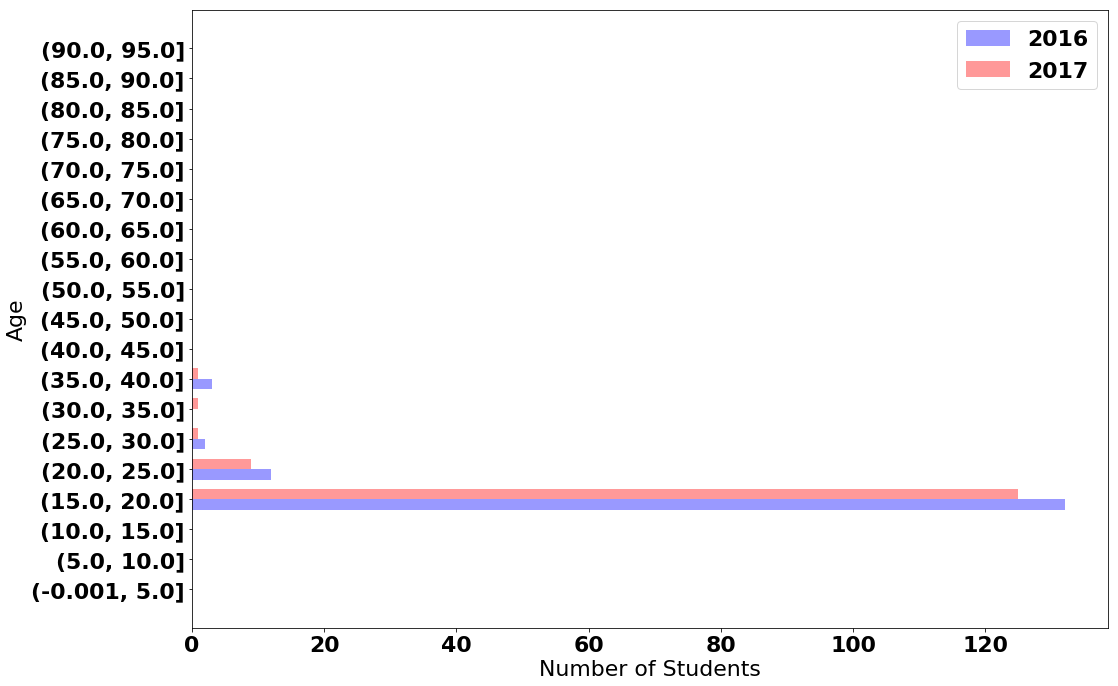

In [16]:
plot_numeric_feature('CA117', 'Age', students_ca117_2016, 2016, students_ca117_2017, 2017, 
                     categories = range(0, 100, 5))

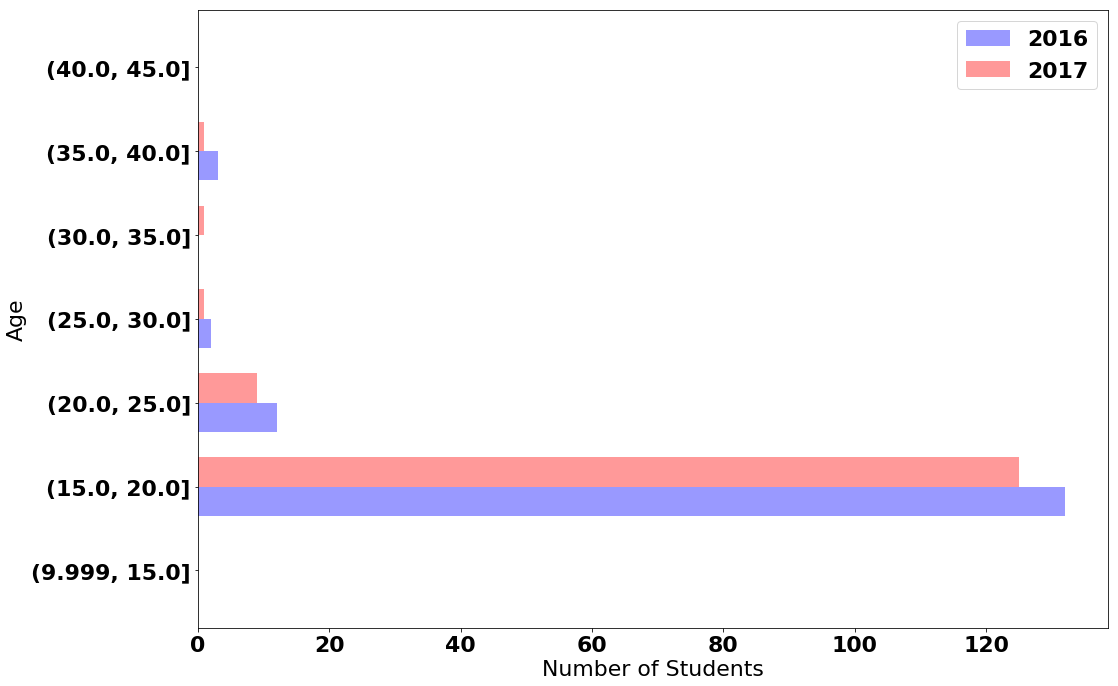

In [17]:
plot_numeric_feature('CA117', 'Age', students_ca117_2016, 2016, students_ca117_2017, 2017, 
                     categories = range(10, 50, 5))

Categorical features:

In [18]:
def plot_categorical_feature(course, feature, students_year_one, year_one, students_year_two, year_two):
    
    # Data in categories
    cat_one = dict(students_year_one[feature].value_counts(sort=False))
    cat_two = dict(students_year_two[feature].value_counts(sort=False))
    
    # Categories
    categories = []
    categories.extend(cat_one.keys())
    categories.extend(cat_two.keys())
    categories = list(set(categories))
    
    values_one = [ cat_one[c] if c in cat_one else 0 for c in categories ]
    values_two = [ cat_two[c] if c in cat_two else 0 for c in categories ]
    
    fig, ax = plt.subplots(figsize=(16, 10))
    index = np.arange(len(categories))
    bar_width = 0.35
    opacity = 0.4

    rects1 = ax.barh(index, values_one, bar_width, alpha=opacity, color='b', label=year_one)
    rects2 = ax.barh(index + bar_width, values_two, bar_width, alpha=opacity, color='r', label=year_two)

    ax.set_xlabel('Number of Students')
    ax.set_ylabel(feature)
    ax.set_yticks(index + bar_width / 2)
    ax.set_yticklabels(categories)
    ax.legend()

    fig.tight_layout()
    
    plt.savefig('../figures/exploring_{}_{}_{}_{}.png'.format(
                    feature.replace(' ', '_'), course.upper(), year_one, year_two), bbox_inches="tight")

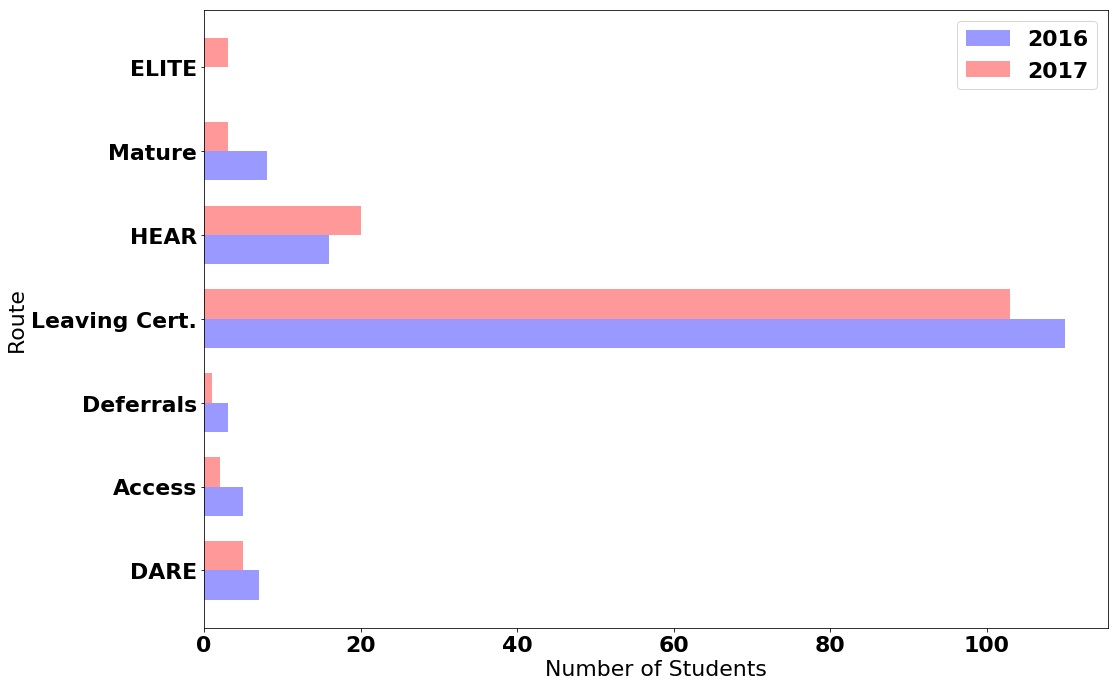

In [19]:
plot_categorical_feature('CA117', 'Route', students_ca117_2016, 2016, students_ca117_2017, 2017)

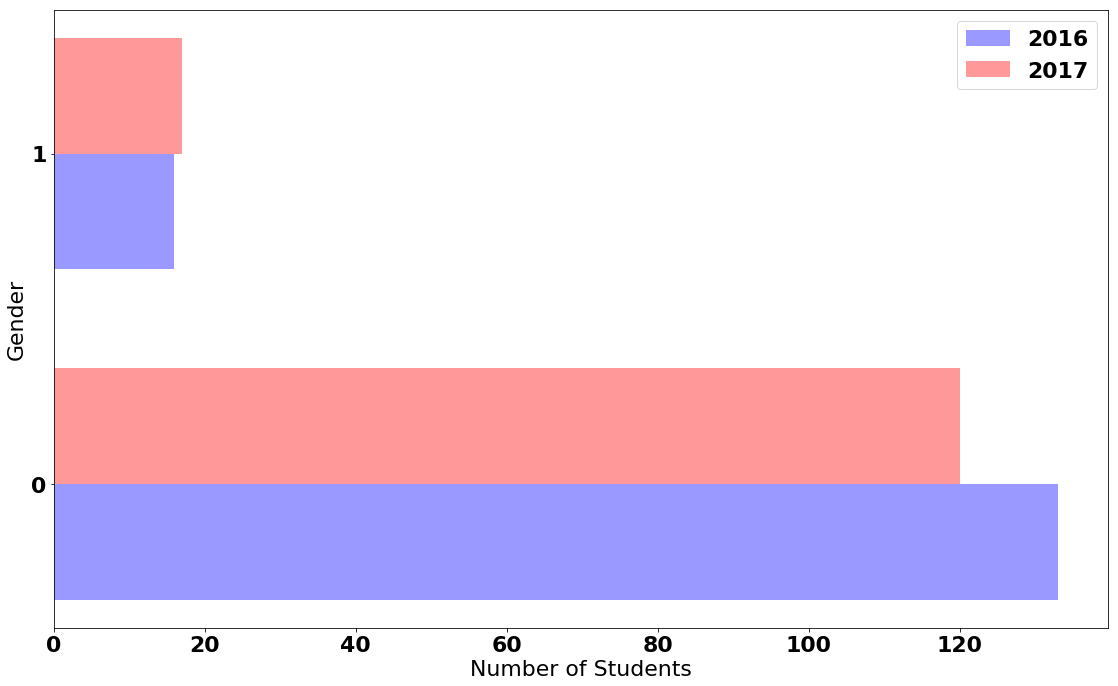

In [20]:
plot_categorical_feature('CA117', 'Gender', students_ca117_2016, 2016, students_ca117_2017, 2017)

## Course: CA114, 2015/2016 vs 2016/2017

In [21]:
# 2015/2016
students_ca114_2016 = pd.read_csv(os.path.join(data_path, 'students-ca114-2016.csv'))

In [22]:
students_ca114_2016.head()

,Student,Username,CAO Points,Route,Route Category,Math Leaving Cert.,Degree,Number Years,Age,Gender,Bio,Distance
0,15307991,akintua2,370,Leaving Cert.,0,46,1,1,18,1,0,8766.14
1,15441702,aspellk2,410,Leaving Cert.,0,46,1,1,17,1,0,60663.86
2,15741891,aughnef2,878,Mature,1,81,1,1,25,0,1,5608.68
3,15455062,boyled29,395,Leaving Cert.,0,46,1,1,18,0,0,886.01
4,15308936,careya22,400,Leaving Cert.,0,56,1,1,18,0,0,45363.05


In [23]:
# 2016/2017
students_ca114_2017 = pd.read_csv(os.path.join(data_path, 'students-ca114-2017.csv'))

In [24]:
students_ca114_2017.head()

,Student,Username,CAO Points,Route,Route Category,Math Leaving Cert.,Degree,Number Years,Age,Gender,Bio,Distance
0,16105567,abornzj2,0,Leaving Cert.,0,0,1,1,20,0,4,8289286.26
1,16386213,adamsoj2,370,Leaving Cert.,0,37,1,1,18,0,0,5608.68
2,16435602,babelan3,978,HEAR,5,37,1,1,17,1,0,178371.16
3,16443652,bannonc5,385,Leaving Cert.,0,71,1,1,18,0,0,99430.31
4,16412316,bellk3,385,Leaving Cert.,0,71,1,1,18,0,0,2245.32


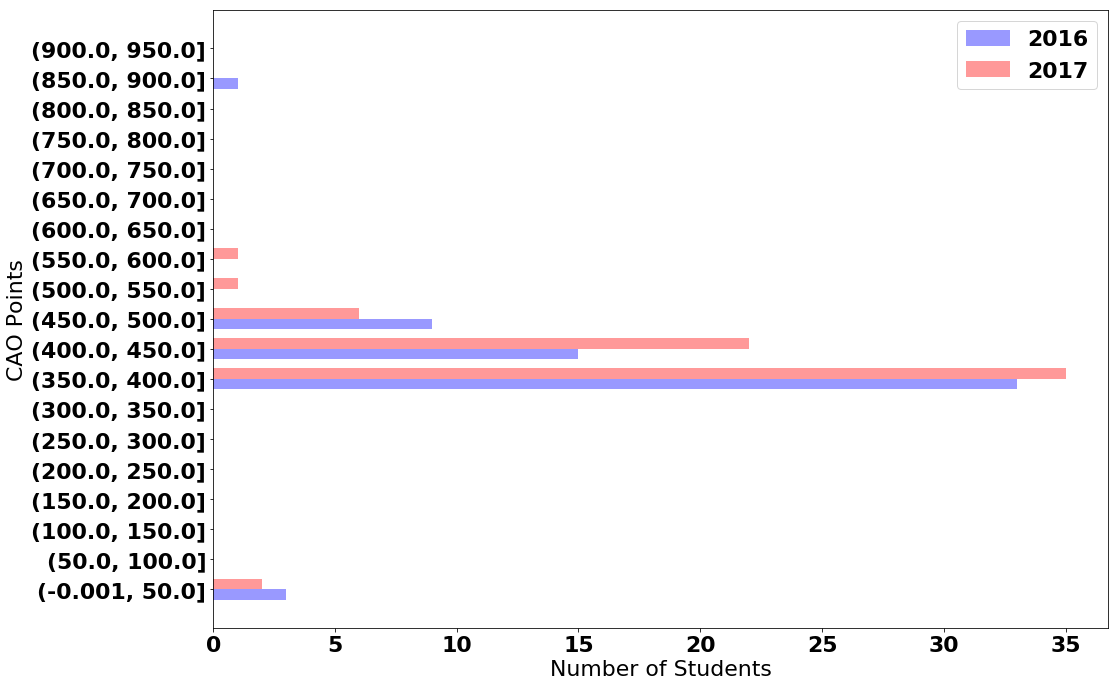

In [25]:
plot_numeric_feature('CA114', 'CAO Points', students_ca114_2016, 2016, students_ca114_2017, 2017)

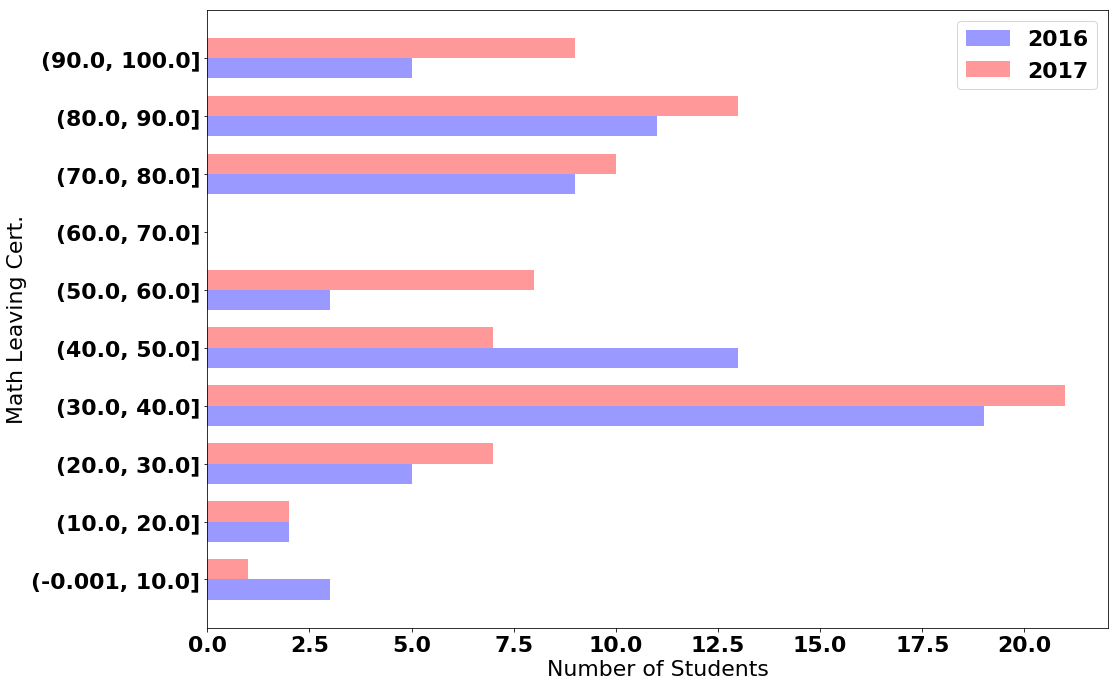

In [26]:
plot_numeric_feature('CA114', 'Math Leaving Cert.', students_ca114_2016, 2016, students_ca114_2017, 2017, 
                     categories = range(0, 110, 10))

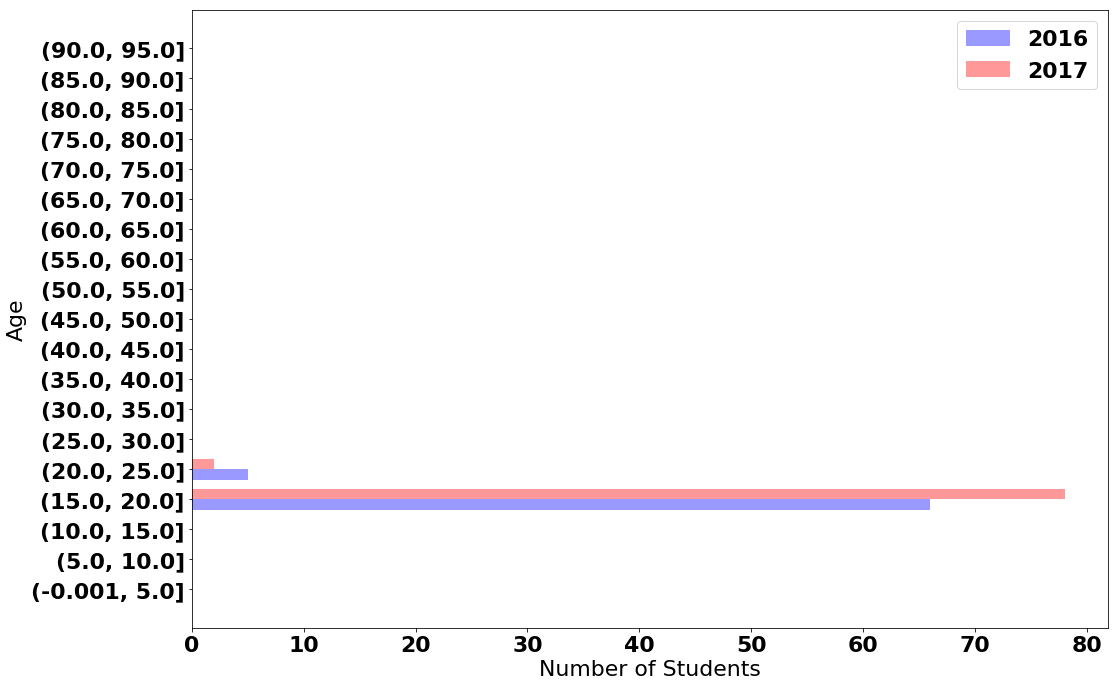

In [27]:
plot_numeric_feature('CA114', 'Age', students_ca114_2016, 2016, students_ca114_2017, 2017, 
                     categories = range(0, 100, 5))

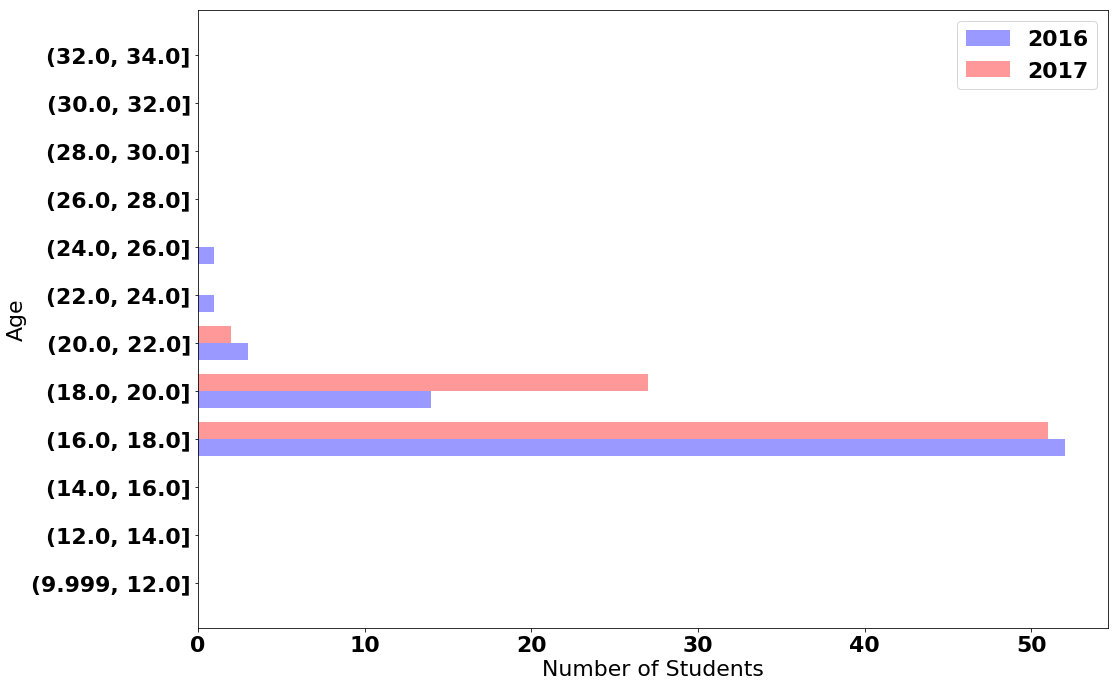

In [28]:
plot_numeric_feature('CA114', 'Age', students_ca114_2016, 2016, students_ca114_2017, 2017, 
                     categories = range(10, 36, 2))

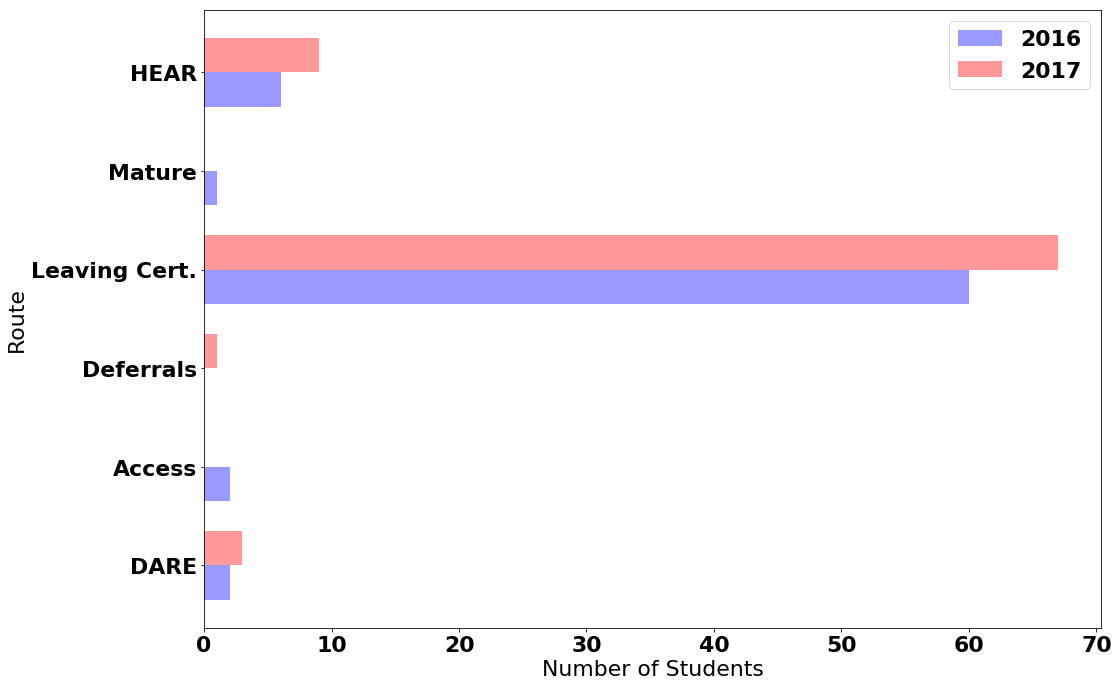

In [29]:
plot_categorical_feature('CA114', 'Route', students_ca114_2016, 2016, students_ca114_2017, 2017)

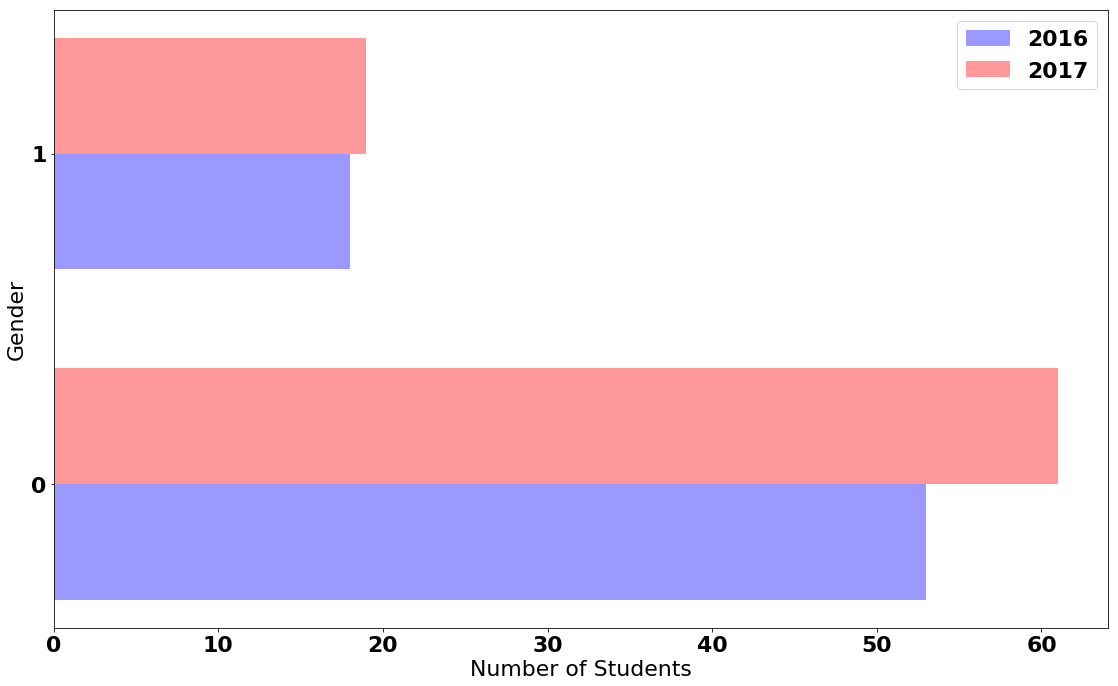

In [30]:
plot_categorical_feature('CA114', 'Gender', students_ca114_2016, 2016, students_ca114_2017, 2017)

## CA116, 2015/2016 vs 2016/2017 vs 2017/2018

In [31]:
# 2015/2016
students_ca116_2016 = pd.read_csv(os.path.join(data_path, 'students-ca116-2016.csv'))

In [32]:
students_ca116_2016.head(2)

,Student,Username,CAO Points,Route,Route Category,Math Leaving Cert.,Degree,Number Years,Age,Gender,Bio,Distance
0,15330326,ajayid2,410,Leaving Cert.,0,37,0,1,17,0,0,4028.63
1,15434842,aliu2,410,Leaving Cert.,0,37,0,1,17,0,0,36609.92


In [33]:
# 2016/2017
students_ca116_2017 = pd.read_csv(os.path.join(data_path, 'students-ca116-2017.csv'))

In [34]:
students_ca116_2017.head(2)

,Student,Username,CAO Points,Route,Route Category,Math Leaving Cert.,Degree,Number Years,Age,Gender,Bio,Distance
0,16105419,abdulmo2,0,Leaving Cert.,0,0,0,1,22,0,4,128932.65
1,16395986,afanaa2,450,Leaving Cert.,0,81,0,1,18,0,0,18905.94


In [35]:
# 2017/2018
students_ca116_2018 = pd.read_csv(os.path.join(data_path, 'students-ca116-2018.csv'))

In [36]:
students_ca116_2018.head(2)

,Student,Username,CAO Points,Route,Route Category,Math Leaving Cert.,Degree,Number Years,Age,Gender,Bio,Distance
0,17356661,ablitte2,466,Leaving Cert.,0,81,0,1,18,1,0,36609.92
1,17393546,achukwv2,411,Leaving Cert.,0,46,0,1,17,0,0,5128.98


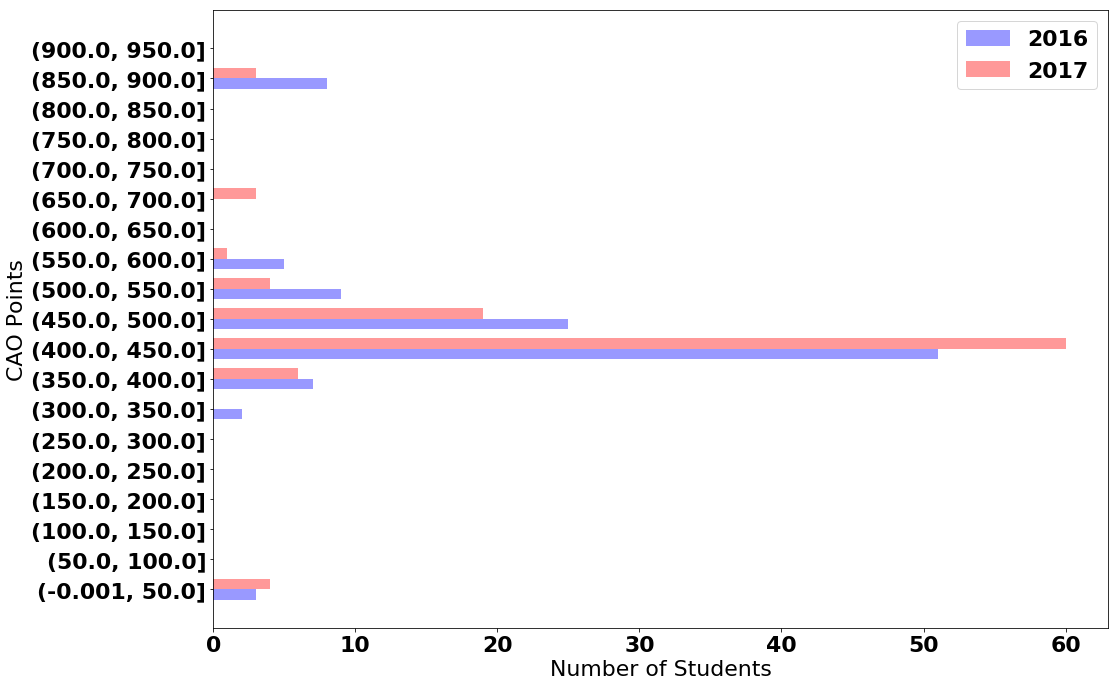

In [37]:
plot_numeric_feature('CA116', 'CAO Points', students_ca116_2016, 2016, students_ca116_2017, 2017) 

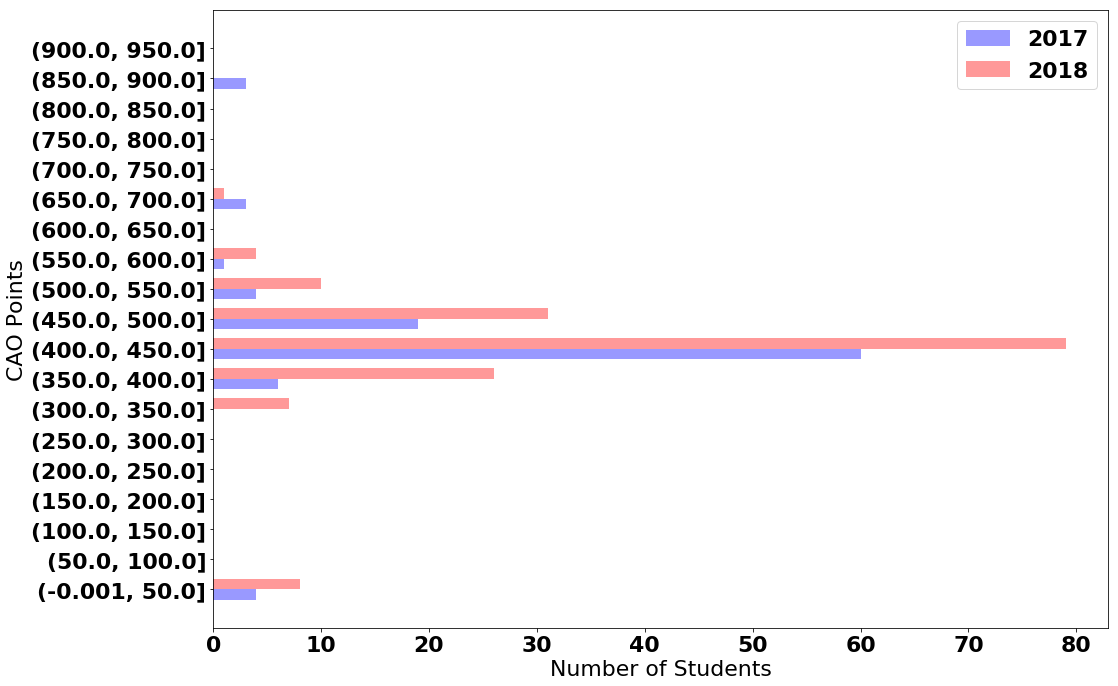

In [38]:
plot_numeric_feature('CA116', 'CAO Points', students_ca116_2017, 2017, students_ca116_2018, 2018) 

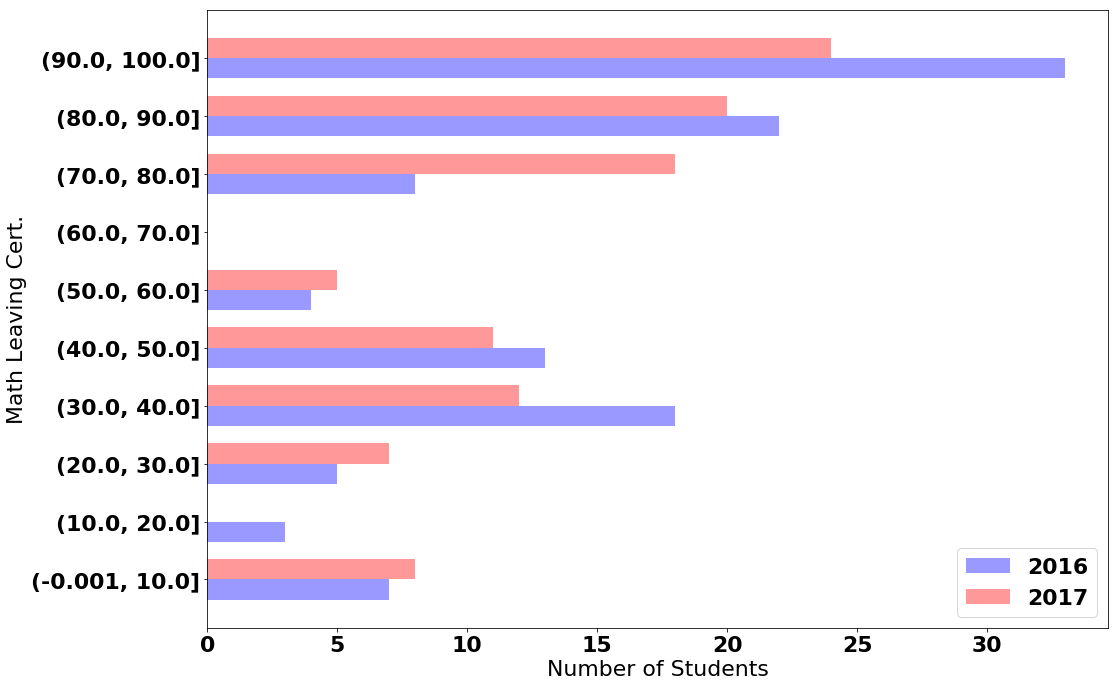

In [39]:
plot_numeric_feature('CA116', 'Math Leaving Cert.', students_ca116_2016, 2016, students_ca116_2017, 2017,
                     categories = range(0, 110, 10))

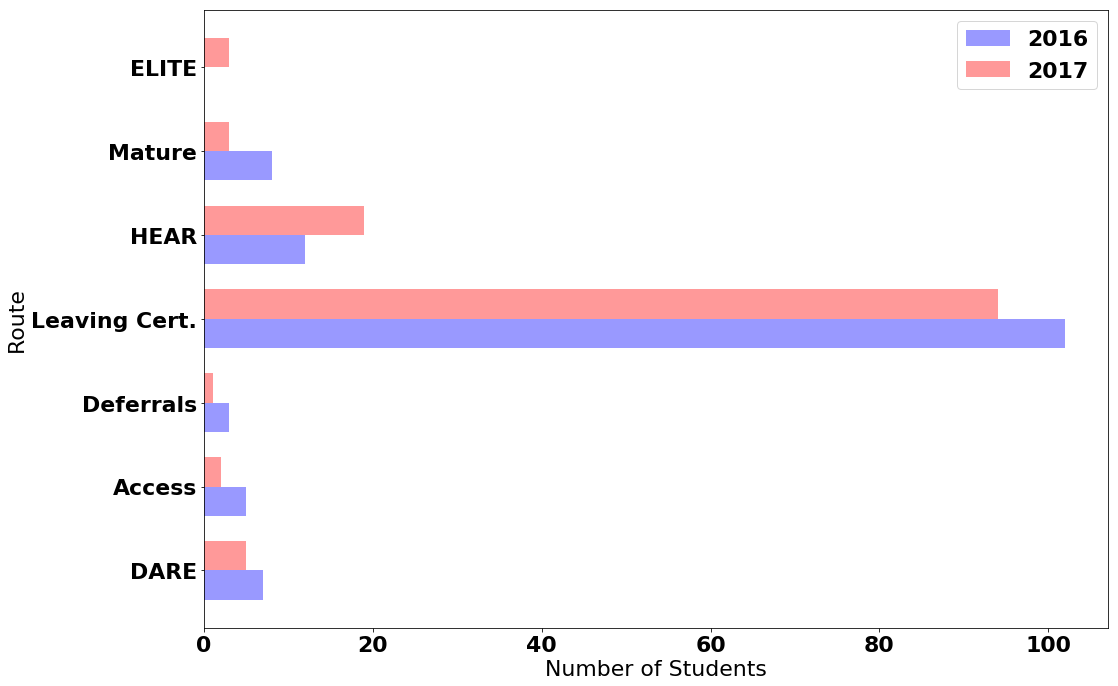

In [40]:
plot_categorical_feature('CA116', 'Route', students_ca116_2016, 2016, students_ca116_2017, 2017)

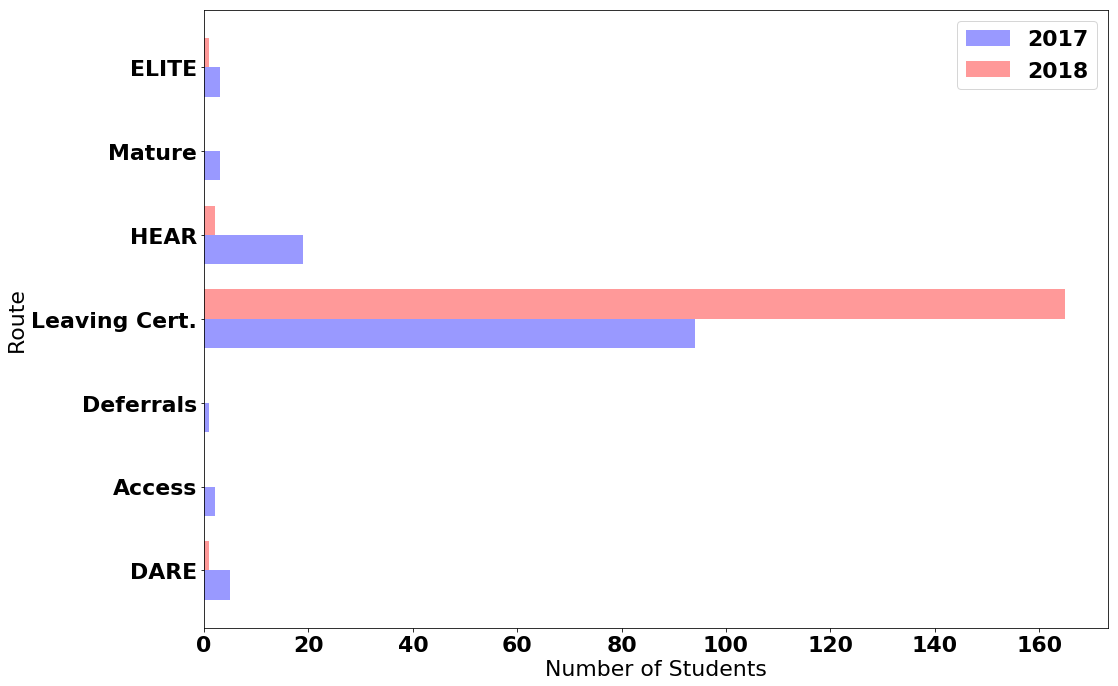

In [41]:
plot_categorical_feature('CA116', 'Route', students_ca116_2017, 2017, students_ca116_2018, 2018)

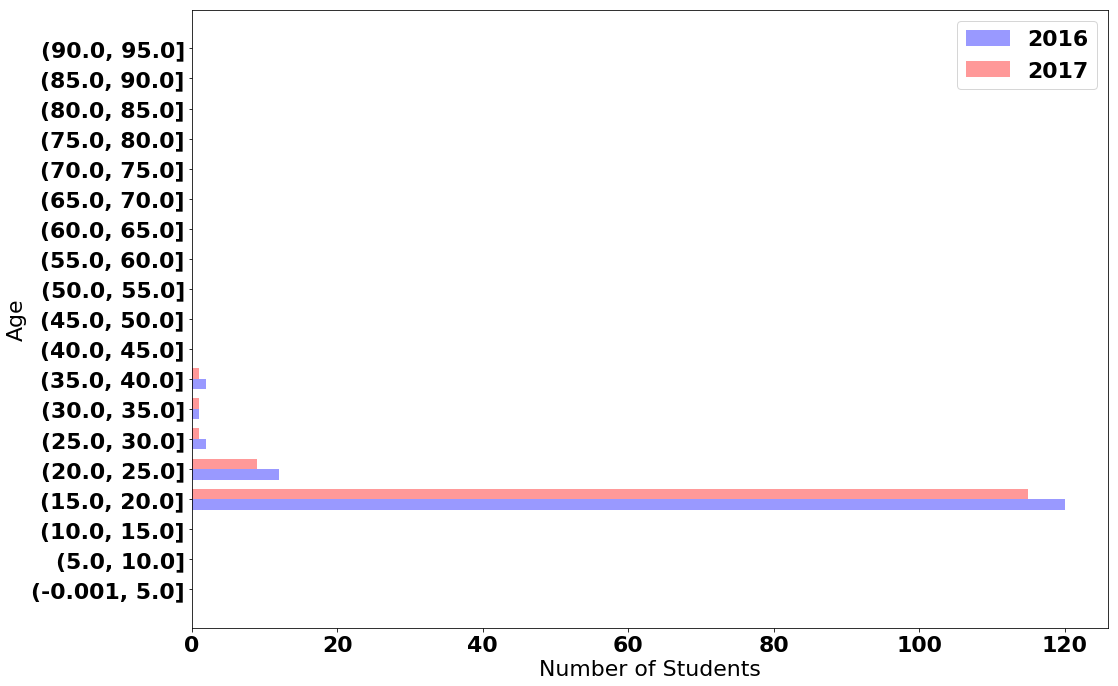

In [42]:
plot_numeric_feature('CA116', 'Age', students_ca116_2016, 2016, students_ca116_2017, 2017, 
                     categories = range(0, 100, 5))

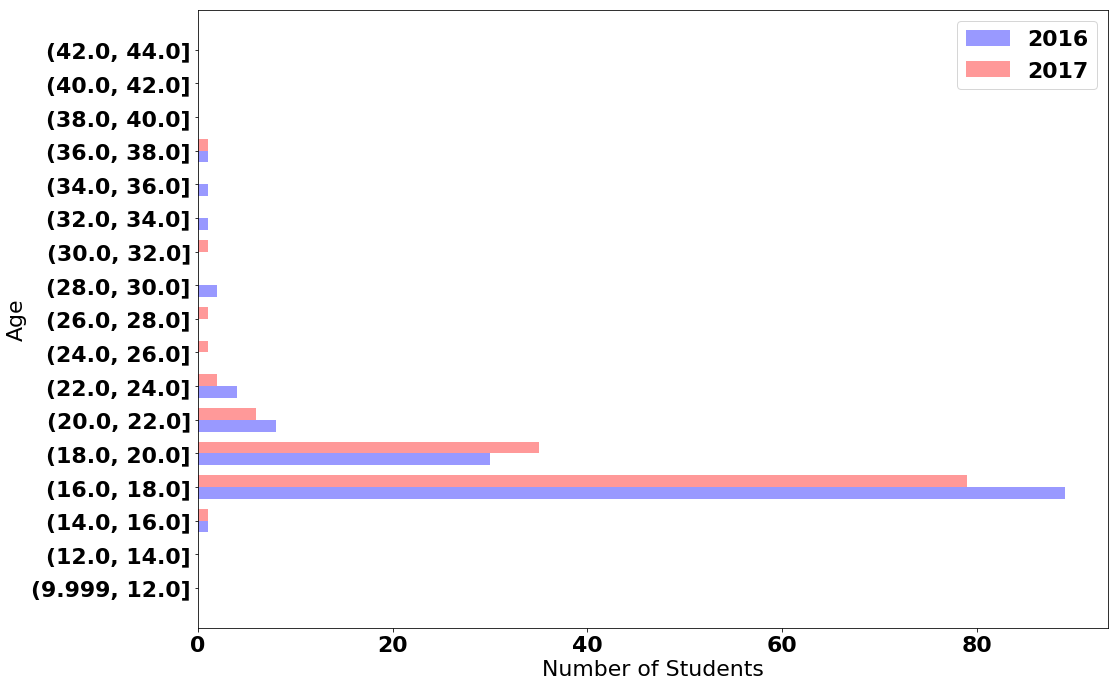

In [43]:
plot_numeric_feature('CA116', 'Age', students_ca116_2016, 2016, students_ca116_2017, 2017, 
                     categories = range(10, 45, 2))